In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
import warnings
warnings.filterwarnings('ignore')

# Data

In [3]:
df = pd.read_csv('news.csv')
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
df.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [5]:
print('Num of duplicates in train: {}'.format(sum(df.duplicated())))

Num of duplicates in train: 0


In [6]:
print('We have {} NaN/Null values in train'.format(df.isnull().values.sum()))

We have 0 NaN/Null values in train


In [7]:
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

# Data Preparation

In [8]:
#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df['text'], labels, train_size=0.70, test_size=0.30, random_state=1)

# Data Viz

REAL    3171
FAKE    3164
Name: label, dtype: int64



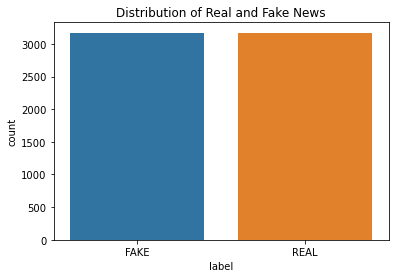

In [9]:
target = df.label.value_counts()
print(target)
print()
sns.countplot(df.label)
plt.title("Distribution of Real and Fake News")
plt.show()

# Initialize TfidfVectorizer

In [10]:
#fidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7) # terms with a higher document frequency will be discarded

#Fit and transform train and test set
tfidf_train=tfidf_vectorizer.fit_transform(X_train) 
tfidf_test=tfidf_vectorizer.transform(X_test)

# Initialize PassiveAggressiveClassifier

In [11]:
# PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

#Predict on the test set and calculate accuracy
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 93.48%


# Confusion Matrix

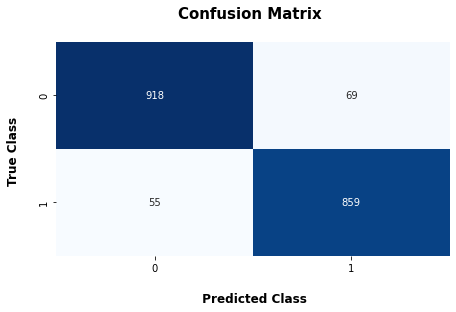

In [12]:
cf = confusion_matrix(y_test, y_pred, labels=["FAKE", "REAL"])
# Create pandas dataframe
dataframe = pd.DataFrame(cf)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix \n", fontweight='bold', fontsize=15), 
plt.tight_layout()
plt.ylabel("True Class \n", fontweight='bold', fontsize=12)
plt.xlabel("\n Predicted Class", fontweight='bold', fontsize=12)
plt.show()